In [10]:
import pandas as pd
import time
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager

# Create Driver

In [2]:
driver = webdriver.Chrome(ChromeDriverManager().install())

In [3]:
page_url = "https://harrypotter.fandom.com/wiki/Category:Individuals"
driver.get(page_url)

In [6]:
book_categories = driver.find_elements_by_class_name("category-page__member-link")

In [8]:
book_categories[0].text

'Template:Individual infobox test'

In [11]:
book_categories[3].get_attribute("href")

'https://harrypotter.fandom.com/wiki/Category:Deceased_individuals'

In [12]:
driver.get(book_categories[3].get_attribute("href"))

In [13]:
character_elems = driver.find_elements_by_class_name("category-page__member-link")

In [15]:
character_elems[0].text

'Giffard Abbott'

# Full code

In [11]:
# create driver
driver = webdriver.Chrome(ChromeDriverManager().install())

# Go to the character wikipage
page_url = "https://harrypotter.fandom.com/wiki/Category:Individuals"
driver.get(page_url)

# Click to accept cookies 
#time.sleep(3)
#driver.find_element(By.XPATH, '//div[text()="ACCEPT"]').click()

# Find subcategories
char_subcategories = driver.find_elements_by_class_name("category-page__member-link")

In [12]:
subcategories = []
for sub in char_subcategories:
    sub_url = sub.get_attribute("href")
    sub_name = sub.text
    subcategories.append({'sub_categories': sub_name, "url": sub_url})

In [13]:
level0_character_list = []
for sub in subcategories:
    # go to character page
    driver.get(sub['url'])
    
    character_elems = driver.find_elements_by_class_name("category-page__member-link")
    
    for elem in character_elems:
        character_url = elem.get_attribute("href")
        level0_character_list.append({'sub':sub['sub_categories'], 'character':elem.text, 'url':character_url})

In [23]:
driver = webdriver.Chrome(ChromeDriverManager().install())
level1_character_list = []
for charac in level0_character_list:
    if 'Category' in charac['character']:
        # go to character page
        driver.get(charac['url'])

        subcharacter_elems = driver.find_elements_by_class_name("category-page__member-link")

        for elem in subcharacter_elems:
            level1_character_list.append({'sub':charac['character'], 'character':elem.text})

KeyboardInterrupt: 

In [ ]:
# join character list
character_list = level0_character_list + level1_character_list

In [27]:
import matplotlib.pyplot as plt

character_df = pd.DataFrame(character_list)

<Figure size 640x480 with 1 Axes>

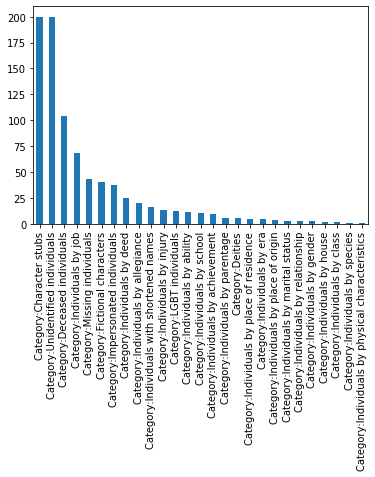

In [29]:
character_df['sub'].value_counts().plot(kind="bar")
plt.show()

In [30]:
character_df.to_csv('harpot_character_list.csv')